## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2023:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOGL)
* Meta (NASDAQ:META).

Using Pandas, yfinance, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2023. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [ ]:
import pandas as pd
import numpy as np


#### Step 2: Import Financial Package
Import the `yfinance` module as `yf`. (you can install the `yfinance` package by entering `pip3 install yfinance` in the command line or `!pip3 install yfinance` in the Jupyter Notebook)

You can learn more about the yfinance package by visiting its [github homepage](https://github.com/ranaroussi/yfinance#readme). Also take a look at the [dependency requirements](https://github.com/ranaroussi/yfinance#requirements) to check that your Python, Pandas, and Numpy versions are compatible for working with yfinance.

In [2]:
import yfinance as yf

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2023 named `start_date` and a datetime object representing July 1st, 2023 named `end_date`.
#### Step 3: Retrieve Data
Call the function `yf.download()` to pull historical data for multiple stocks. `.download()` should take three arguments &mdash; the first is a positional argument that holds the list of stock symbols for which we'd like to download data. The second and third arguments should be keyword arguments `start` and `end`, which should be set to `start_date` and `end_date` respectively. Save the result to a variable called `stock_data`. You can read more about the `.download()` method on the [yfinance wiki](https://github.com/ranaroussi/yfinance/wiki/Tickers#download)
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [8]:
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
start_date = '2023-01-01'
end_date = '2023-07-01'

stock_data = yf.download(symbols, start=start_date, end=end_date)
stock_data.head()

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                \
                  AAPL       AMZN       GOOG        META        MSFT   
Date                                                                   
2023-01-03  124.538658  85.820000  89.699997  124.739998  237.956329   
2023-01-04  125.823189  85.139999  88.709999  127.370003  227.547348   
2023-01-05  124.488876  83.120003  86.769997  126.940002  220.803360   
2023-01-06  129.069321  86.080002  88.160004  130.020004  223.405609   
2023-01-09  129.597061  87.360001  88.800003  129.470001  225.580750   

                 Close                                                ...  \
                  AAPL       AMZN       GOOG        META        MSFT  ...   
Date                                                                  ...   
2023-01-03  125.070000  85.820000  89.699997  124.739998  239.580002  ...   
2023-01-04  126.360001  85.139999  88.709999  127.370003  229.100006  ...   
2023-01-05  125.019997  83.120003  86.769997  126.940002  222.309998  ...   
2023-01-06  129.619995  86.080002  88.160004  130.020004  224.929993  ...   
2023-01-09  130.149994  87.360001  88.800003  129.470001  227.119995  ...   

                  Open                                                \
                  AAPL       AMZN       GOOG        META        MSFT   
Date                                                                   
2023-01-03  130.279999  85.459999  89.830002  122.820000  243.080002   
2023-01-04  126.889999  86.550003  91.010002  127.379997  232.279999   
2023-01-05  127.129997  85.330002  88.070000  126.129997  227.199997   
2023-01-06  126.010002  83.029999  87.360001  128.970001  223.000000   
2023-01-09  130.470001  87.459999  89.195000  131.160004  226.449997   

               Volume                                          
                 AAPL      AMZN      GOOG      META      MSFT  
Date                                                           
2023-01-03  112117500  76706000  20738500  35528500  25740000  
2023-01-04   89113600  68885100  27046500  32397100  50623400  
2023-01-05   80962700  67930800  23136100  25447100  39585600  
2023-01-06   87754700  83303400  26612600  27584500  43613600  
2023-01-09   70790800  65266100  22996700  26649100  27369800  

[5 rows x 30 columns]

In [10]:
stock_data['Adj Close'].head()

,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2023-01-03,124.538658,85.820000,89.699997,124.739998,237.956329
2023-01-04,125.823189,85.139999,88.709999,127.370003,227.547348
2023-01-05,124.488876,83.120003,86.769997,126.940002,220.803360
2023-01-06,129.069321,86.080002,88.160004,130.020004,223.405609
2023-01-09,129.597061,87.360001,88.800003,129.470001,225.580750


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

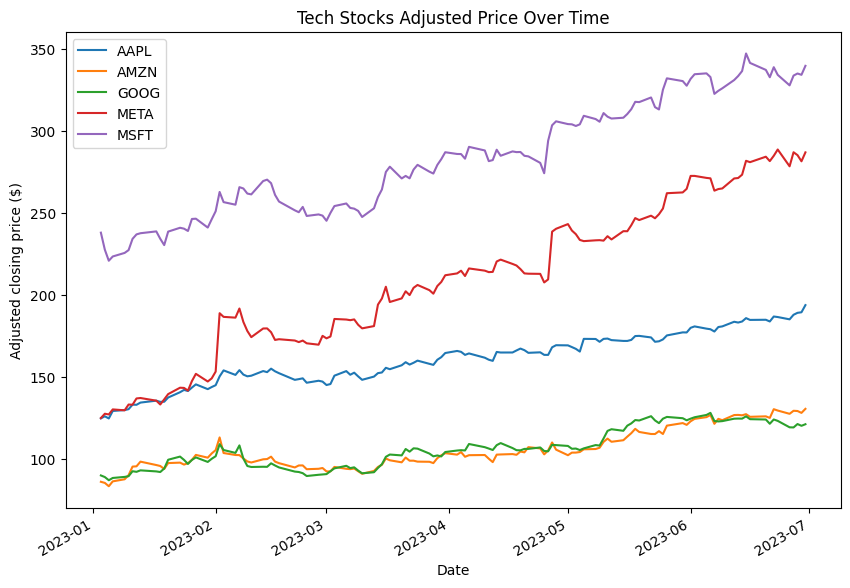

In [15]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Tech Stocks Adjusted Price Over Time')
plt.show()


### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

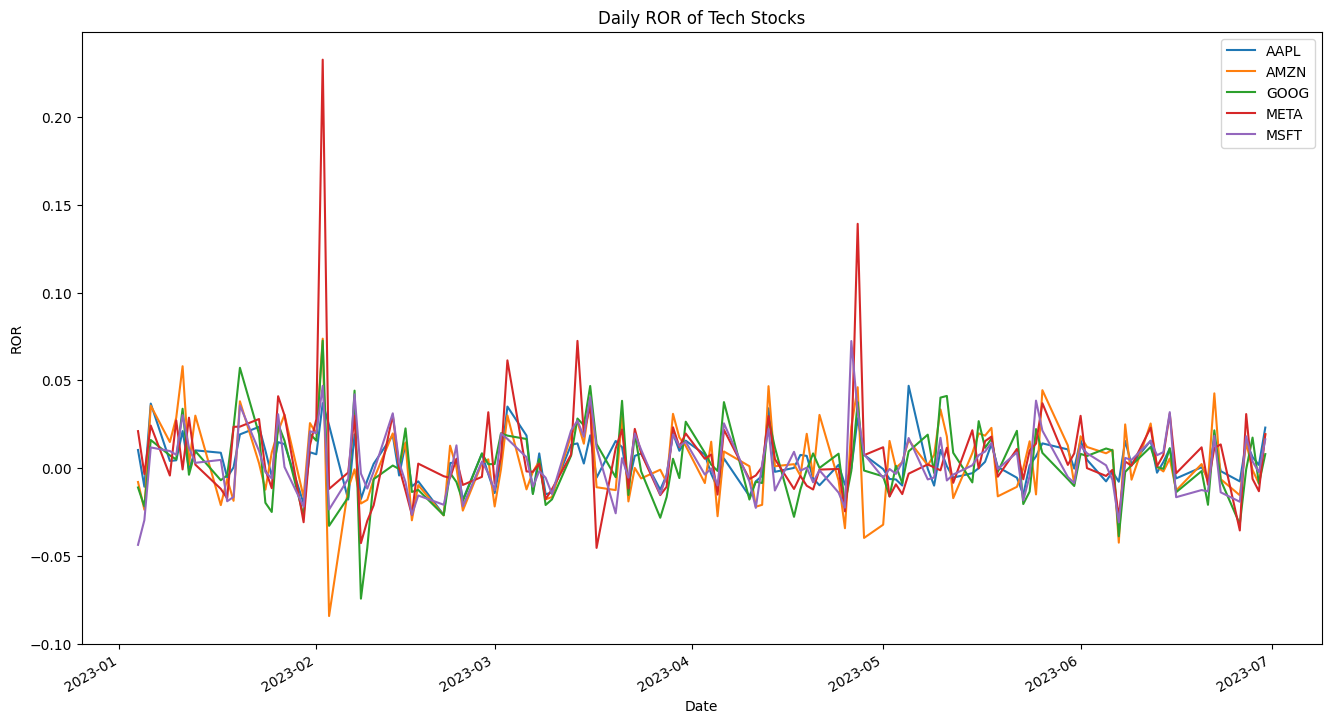

In [18]:
stock_data_closing_returns = stock_data['Adj Close'].pct_change()
stock_data_closing_returns.plot(figsize=(16, 9))
plt.xlabel('Date')
plt.ylabel('ROR')
plt.title('Daily ROR of Tech Stocks')
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

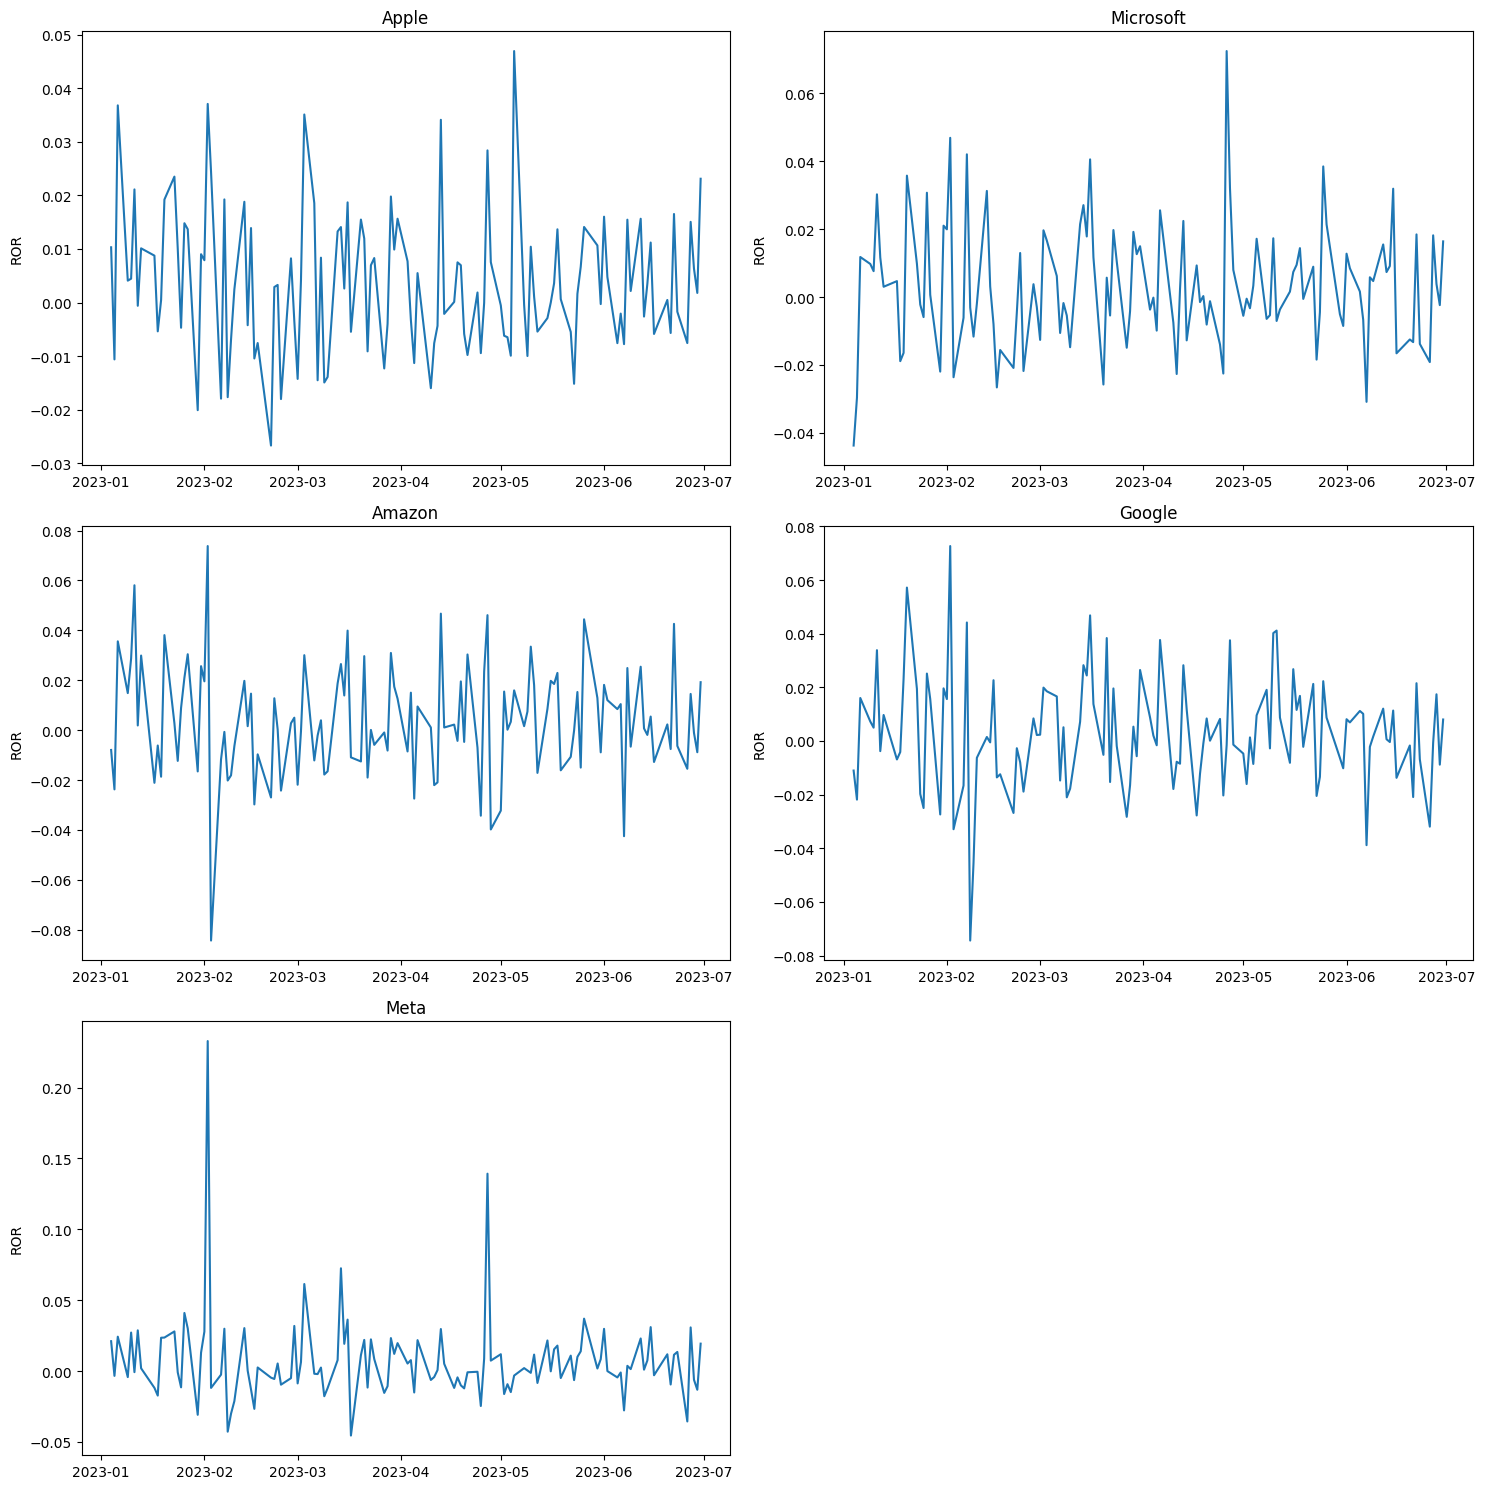

In [20]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax1.plot(stock_data_closing_prices['AAPL'].pct_change())
ax1.set_title('Apple')
ax1.set_ylabel('ROR')
ax2.plot(stock_data_closing_prices['MSFT'].pct_change())
ax2.set_title('Microsoft')
ax2.set_ylabel('ROR')
ax3.plot(stock_data_closing_prices['AMZN'].pct_change())
ax3.set_title('Amazon')
ax3.set_ylabel('ROR')
ax4.plot(stock_data_closing_prices['GOOG'].pct_change())
ax4.set_title('Google')
ax4.set_ylabel('ROR')
ax5.plot(stock_data_closing_prices['META'].pct_change())
ax5.set_title('Meta')
ax5.set_ylabel('ROR')
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [23]:
daily_mean = stock_data_closing_returns.mean()

daily_mean

AAPL    0.003682
AMZN    0.003652
GOOG    0.002656
META    0.007224
MSFT    0.003060
dtype: float64

In [24]:
daily_mean.keys()

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype='object')

In [26]:
height = [daily_mean[k] for k in daily_mean.keys()]

height

[0.003681784010315854,
 0.0036520392611041766,
 0.002655917248981277,
 0.007223537098665538,
 0.003060325900230786]

In [27]:
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

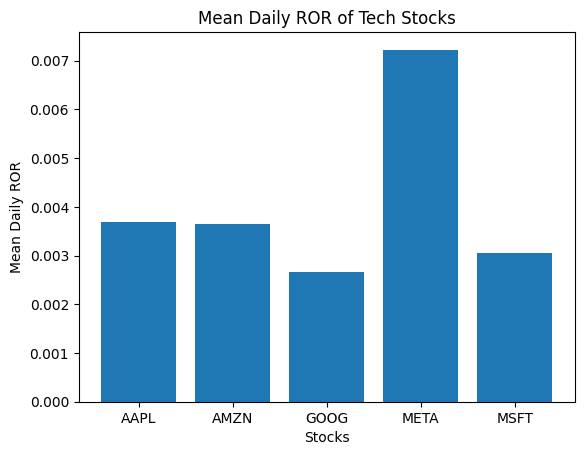

In [29]:
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_mean.keys())

plt.xlabel('Stocks')
plt.ylabel('Mean Daily ROR')
plt.title('Mean Daily ROR of Tech Stocks')

plt.show()

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [31]:
daily_var = stock_data_closing_returns.var()
daily_var

AAPL    0.000171
AMZN    0.000500
GOOG    0.000448
META    0.000931
MSFT    0.000324
dtype: float64

In [32]:
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype='object')

In [33]:
height = [daily_var[k] for k in daily_var.keys()]

In [34]:
x_pos = np.arange(len(daily_var.keys()))

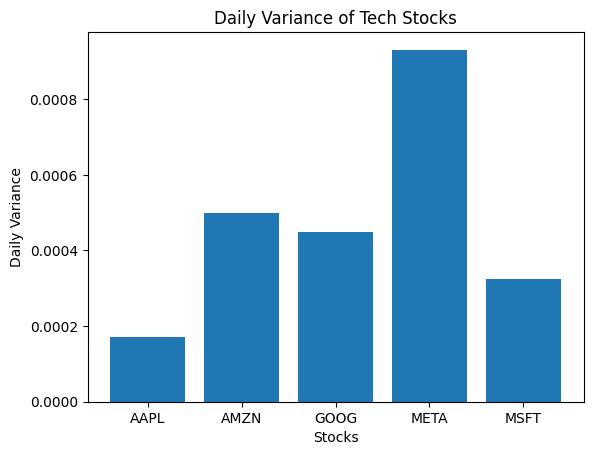

In [35]:
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_var.keys())

plt.xlabel('Stocks')
plt.ylabel('Daily Variance')
plt.title('Daily Variance of Tech Stocks')

plt.show()

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [37]:
daily_std = stock_data_closing_returns.std()
daily_std

AAPL    0.013065
AMZN    0.022353
GOOG    0.021161
META    0.030510
MSFT    0.017993
dtype: float64

In [38]:
daily_std.keys()

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype='object')

In [39]:
height = [daily_std[k] for k in daily_std.keys()]

In [40]:
x_pos = np.arange(len(daily_std.keys()))

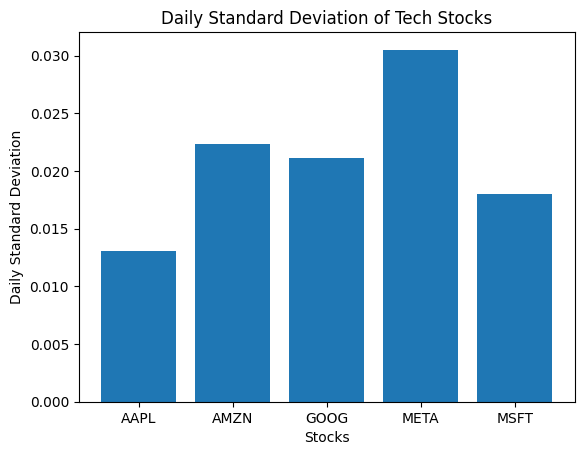

In [42]:
plt.bar(x_pos, height)
plt.xticks(x_pos, daily_std.keys())

plt.xlabel('Stocks')
plt.ylabel('Daily Standard Deviation')
plt.title('Daily Standard Deviation of Tech Stocks')
plt.show()

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [43]:
stock_data_closing_returns.corr()

,AAPL,AMZN,GOOG,META,MSFT
AAPL,1.000000,0.555239,0.605834,0.578896,0.583447
AMZN,0.555239,1.000000,0.639588,0.578416,0.644662
GOOG,0.605834,0.639588,1.000000,0.619816,0.636848
META,0.578896,0.578416,0.619816,1.000000,0.533364
MSFT,0.583447,0.644662,0.636848,0.533364,1.000000
